## Gradient Descent

###  by Thomas Oswald
#### DATA 4319, Spring 2020

Gradient Descent: an optimization algorithm used to minimize some function by iteratively moving in the direction of 
steepest descent as defined by the negative of the gradient.  In this notebook, I will use Gradient Descent to find the local 
minimums of a quadtraic formula as well as plotting the descent  on different measurements of a single species within the Iris 
Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x2 = range(0,11)
y2 = []
for i in x2:
    y2.append(i**2 - 8*i + 19)                    # for the following formula: x^2 - 8x + 19

Text(0, 0.5, 'y')

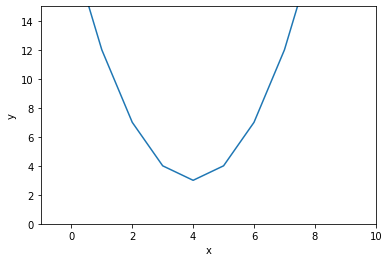

In [3]:
plt.plot(x2,y2)

plt.xlim(-1,10)
plt.xlabel('x')
plt.ylim(0,15)
plt.ylabel('y')

In [4]:
# Assigned random weight values
W = np.random.rand(2, 1)
W

array([[0.30179497],
       [0.18501504]])

In [5]:
# function for the graph above
def f(x):
    return (x-4)**2 + 3

# definition of the derivative
def df(x, e):
    return (f(x + e) - f(x))/e

In [6]:
# Gradient Descent
def gradient_descent(x_0, alpha, iter_count):
    points = np.asarray([(x_0, f(x_0))])
    for _ in range(1,iter_count):
        x_0 = x_0 - np.dot(alpha, df(x_0, 0.001))
        #print(x_0, f(x_0))
        points = np.append(points, np.array( [[x_0, f(x_0)]] ) , axis=0) 
        
                           # good answer
        #points = np.asarray([x_0, f(x_0)])
    
    return points        

In [7]:
# print the 15 iterations the function went through to find the local minimum
D = gradient_descent(9.0, 0.75, 15)
D

array([[ 9.        , 28.        ],
       [ 1.49925   ,  9.25375056],
       [ 5.249625  ,  4.56156264],
       [ 3.3744375 ,  3.39132844],
       [ 4.31203125,  3.0973635 ],
       [ 3.84323437,  3.02457546],
       [ 4.07763281,  3.00602685],
       [ 3.96043359,  3.0015655 ],
       [ 4.0190332 ,  3.00036226],
       [ 3.9897334 ,  3.0001054 ],
       [ 4.0043833 ,  3.00001921],
       [ 3.99705835,  3.00000865],
       [ 4.00072083,  3.00000052],
       [ 3.99888959,  3.00000123],
       [ 3.99980521,  3.00000004]])

Text(0, 0.5, 'y')

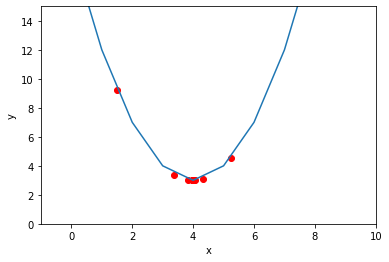

In [8]:
# Plot of the original function
plt.plot(x2,y2)

# Plot the local minimum
plt.scatter(D[0:, :1],
            D[0:, 1:],
            color = 'r')

plt.xlim(-1,10)
plt.xlabel('x')
plt.ylim(0,15)
plt.ylabel('y')

This next part focuses on the descent of a single cluster of points from the Iris data set

In [9]:
# Read in the Iris Dataset csv
data = pd.read_csv('iris_data.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Create a subset for a single species
data = data.loc[data['Species'] == "versicolor"]
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [11]:
# Create more subsets for specific iris measurements
x = data.loc[:, 'SepalLength'].values
y = data.loc[:, 'PetalLength'].values

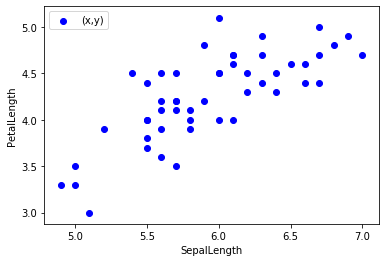

In [12]:
# Scatter plot the measurements
plt.scatter(x,
            y,
            color = "b")

plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend(['(x,y)'])

In [13]:
# Assigned random weight values
np.random.seed(1)
W = np.random.rand(2, 1)
W                                                                       # W is a 2x1 array

array([[0.417022  ],
       [0.72032449]])

In [14]:
# y_hat function. This will return the dot product of our transposed weights with a 2x1 array. This array has a given x
# measurement and 1.0 as a bias.
def y_hat(x, W):
    return np.dot(np.transpose(W), np.array([[x], [1.0]]))              # 1x2 * 2x1 = 1x1 array

In [15]:
# Loss Function
def loss(x, y, W):
    for i, j in zip(x,y):
        return [sum(-i*(j - y_hat(i, W))), sum(i*(j - y_hat(i, W)))]    # returns a 2x1 array

In [16]:
# Steepest Descent function
def steepest_descent(x, y, W, alpha, iter_count):
    for _ in range(1,iter_count+1):
        W = W - np.asarray(alpha) * loss(x, y, W)                       # make alpha an array so a 1x1 * 2x1 = 2x1
    return W

In [17]:
W = steepest_descent(x, y, W, 0.002, 100)
W

array([[0.59374824],
       [0.54359826]])

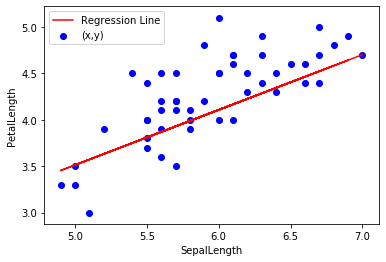

In [18]:
y_new = W[0]*x + W[1]
plt.scatter(x,
            y,
            color = 'b')

plt.plot(x,
         y_new,
         color = 'r')

plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend(['Regression Line','(x,y)'])